In [ ]:
from cmath import nan
import numpy as np
import matplotlib.pyplot as plt
from utility_fast import *
from helpers import *

In [6]:
N=100
dt=5e-12
softening=1e-6
k=8.9875517923*1e9
vy=100
dt=5e-12

In [7]:
species, pos_save = DF_nbody(N,dt,softening,k,vy)

In [8]:
import matplotlib.animation as animation
from matplotlib import rcParams
from IPython.display import HTML
rcParams['animation.embed_limit'] = 60
import matplotlib.patches as mpatches


#fig = plt.figure(figsize=(4,5), dpi=80)
#grid = plt.GridSpec(1, 1, wspace=0.0, hspace=0.3)
#ax1 = plt.subplot(grid[0,0])


# 2D

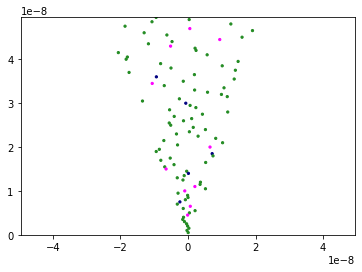

In [9]:

colors=["forestgreen","navy","fuchsia"]
col_list=["forestgreen"]
col_list=[colors [int(i)] for i in list(species[:-1])]

fig, ax = plt.subplots()

l, = ax.plot([],[])

ymax=np.nanmax(pos_save[:,1,-1])

def animate(i):
    ax.clear()
    ax.axis([-ymax,ymax,0,ymax])
    xx = pos_save[:i,0,i]
    yy = pos_save[:i,1,i]
    ax.scatter(xx, yy,s=5,color=col_list[:i])

anim = animation.FuncAnimation(fig, animate,frames=N)


HTML(anim.to_jshtml())

# 3D

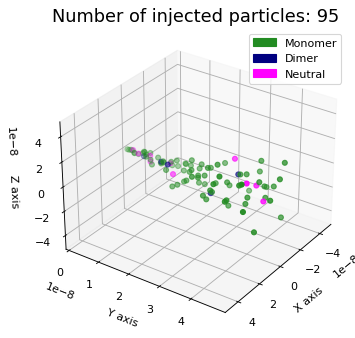

In [10]:
colors=["forestgreen","navy","fuchsia"]
col_list=["forestgreen"]
col_list=[colors [int(i)] for i in list(species[:-1])]

mono_patch = mpatches.Patch(color='forestgreen', label='Monomer')
dim_patch = mpatches.Patch(color='navy', label='Dimer')
neut_patch = mpatches.Patch(color='fuchsia', label='Neutral')

ymax=np.nanmax(pos_save[:,1,-1])

fig = plt.figure(figsize=(5,5), dpi=80)
grid = plt.GridSpec(1, 1, wspace=0.0, hspace=0.3)
ax = plt.axes(projection ='3d')

l, = ax.plot([],[])

def animate(j):
    i=5*j
    ax.clear()
    ax.axis([-2e-7,2e-7,0,2e-7])
    xx = pos_save[:i,0,i]
    yy = pos_save[:i,1,i]
    zz = pos_save[:i,2,i]
    ax.scatter(xx,yy,zz,color=col_list[:i])
    ax.set(xlim=(-ymax, ymax), ylim=(0, ymax),zlim=(-ymax, ymax))
    plt.title('Number of injected particles: %i' %i, fontsize=16)
    plt.legend(handles=[mono_patch, dim_patch,neut_patch])
    ax.set_aspect('auto', 'box')
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.view_init(elev=30., azim=35)
    
    

anim = animation.FuncAnimation(fig, animate,frames=int(N/5))
anim.save('myanimation.gif') 
HTML(anim.to_jshtml())






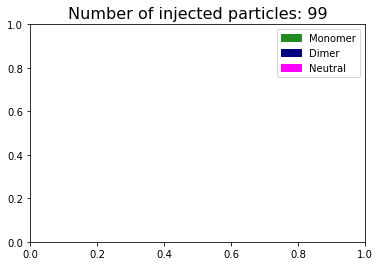

In [7]:
anim.save('myanimation.gif') 